In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('tcpdump-logs.csv', header=None, usecols=[0,1,2,3], names=['date','timestamp', 'src', 'dst'])

In [16]:
len(df)

6403788

In [17]:
df.head()

,date,timestamp,src,dst
0,2024-05-17,23:25:13.408761,192.0.0.2.56496,239.255.255.250.ssdp
1,2024-05-17,23:25:14.409942,192.0.0.2.56496,239.255.255.250.ssdp
2,2024-05-17,23:25:15.410977,192.0.0.2.56496,239.255.255.250.ssdp
3,2024-05-17,23:25:49.992778,192.168.86.1.bootps,192.168.86.223.bootpc
4,2024-05-17,23:25:52.123417,192.168.86.1.bootps,192.168.86.223.bootpc


In [18]:
df['datetime'] = pd.to_datetime(df['date'] + ' ' + df['timestamp'])
df = df.drop(['date', 'timestamp'], axis=1)

In [19]:
hostnames = ['192.168.86.223','10.102.4.66','192.0.0.2']

df['hostname'] = ''
df['port'] = ''
df['outgoing'] = False
df['incoming'] = False
df['remote'] = ''

for hostname in hostnames:
    # Check column 2 for outgoing connections
    mask_outgoing = df['src'].str.startswith(hostname)
    df.loc[mask_outgoing, 'hostname'] = hostname
    df.loc[mask_outgoing, 'port'] = df['src'].str.replace(hostname + '.', '')
    df.loc[mask_outgoing, 'outgoing'] = mask_outgoing
    df.loc[mask_outgoing, 'remote'] = df['dst']

    # Check column 3 for incoming connections
    mask_incoming = df['dst'].str.startswith(hostname)
    df.loc[mask_incoming, 'hostname'] = hostname
    df.loc[mask_incoming, 'port'] = df['dst'].str.replace(hostname + '.', '')
    df.loc[mask_incoming, 'incoming'] = mask_incoming
    df.loc[mask_incoming, 'remote'] = df['src']

In [20]:
sum( ~((df['outgoing'] == True) | (df['incoming'] == True)) )

0

In [21]:
df.head(20)

,src,dst,datetime,hostname,port,outgoing,incoming,remote
0,192.0.0.2.56496,239.255.255.250.ssdp,2024-05-17 23:25:13.408761,192.0.0.2,56496,True,False,239.255.255.250.ssdp
1,192.0.0.2.56496,239.255.255.250.ssdp,2024-05-17 23:25:14.409942,192.0.0.2,56496,True,False,239.255.255.250.ssdp
2,192.0.0.2.56496,239.255.255.250.ssdp,2024-05-17 23:25:15.410977,192.0.0.2,56496,True,False,239.255.255.250.ssdp
3,192.168.86.1.bootps,192.168.86.223.bootpc,2024-05-17 23:25:49.992778,192.168.86.223,bootpc,False,True,192.168.86.1.bootps
4,192.168.86.1.bootps,192.168.86.223.bootpc,2024-05-17 23:25:52.123417,192.168.86.223,bootpc,False,True,192.168.86.1.bootps
5,192.168.86.223.mdns,224.0.0.251.mdns,2024-05-17 23:25:53.792653,192.168.86.223,mdns,True,False,224.0.0.251.mdns
6,192.168.86.244.57354,192.168.86.223.afs3-fileserver,2024-05-17 23:25:53.891895,192.168.86.223,afs3-fileserver,False,True,192.168.86.244.57354
7,192.168.86.223.58502,192.168.86.1.domain,2024-05-17 23:25:53.924047,192.168.86.223,58502,True,False,192.168.86.1.domain
8,192.168.86.223.50117,192.168.86.1.domain,2024-05-17 23:25:53.924050,192.168.86.223,50117,True,False,192.168.86.1.domain
9,192.168.86.1.domain,192.168.86.223.50117,2024-05-17 23:25:53.943684,192.168.86.223,50117,False,True,192.168.86.1.domain


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


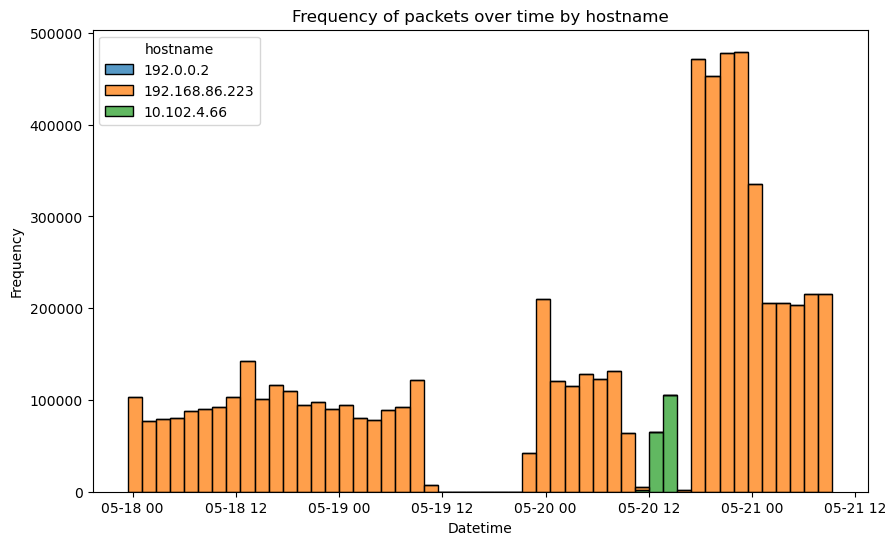

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', hue='hostname', multiple="stack", bins=50, edgecolor='black')
plt.title('Frequency of packets over time by hostname')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


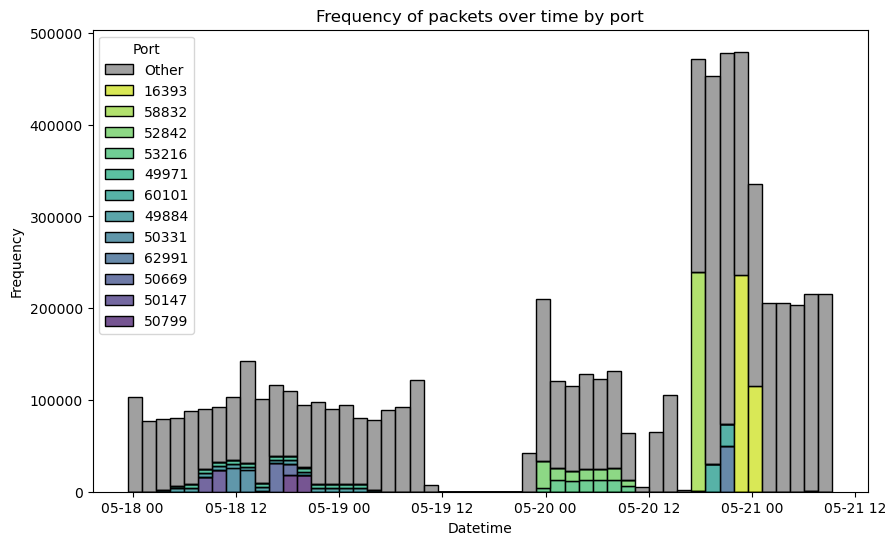

In [23]:
# Identify the most frequent ports
top_ports = df['port'].value_counts().nlargest(12).index

# Create a new column where all other ports are replaced with 'Other'
df['Port'] = df['port'].where(df['port'].isin(top_ports), 'Other')
df['Port'] = pd.Categorical(df['Port'], categories=["Other"] + list(top_ports), ordered=True)

# Generate the desired colormap
colors = sns.color_palette("viridis", len(top_ports))[::-1]
colors_dict = dict(zip(top_ports, colors))
colors_dict['Other'] = [0.5, 0.5, 0.5]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', hue='Port', multiple="stack", bins=50, edgecolor='black', palette=colors_dict)
plt.title('Frequency of packets over time by port')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


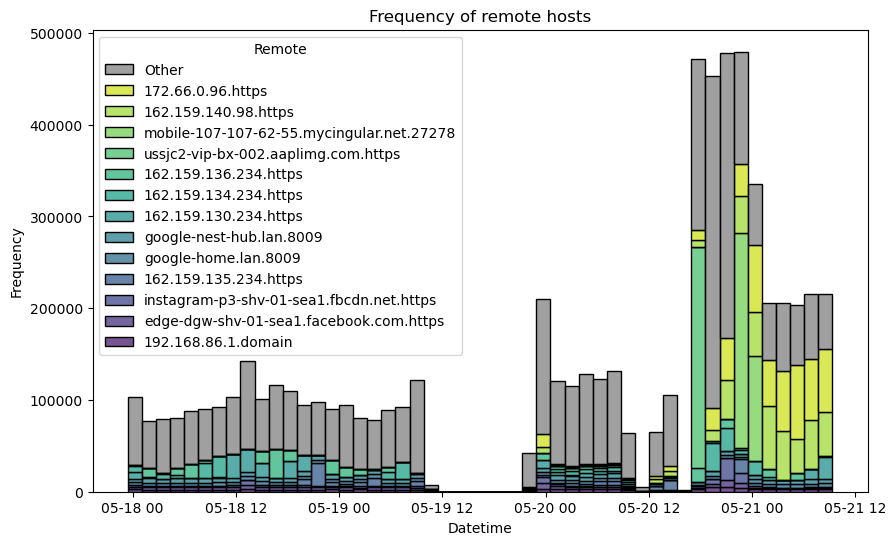

In [24]:
# Identify the most frequent ports
top_remotes = df['remote'].value_counts().nlargest(13).index

# Create a new column where all other ports are replaced with 'Other'
df['Remote'] = df['remote'].where(df['remote'].isin(top_remotes), 'Other')
df['Remote'] = pd.Categorical(df['Remote'], categories=["Other"] + list(top_remotes), ordered=True)

# Generate the desired colormap
colors = sns.color_palette("viridis", len(top_remotes))[::-1]
colors_dict = dict(zip(top_remotes, colors))
colors_dict['Other'] = [0.5, 0.5, 0.5]

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', hue='Remote', multiple="stack", bins=50, edgecolor='black', palette=colors_dict)
plt.title('Frequency of remote hosts')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


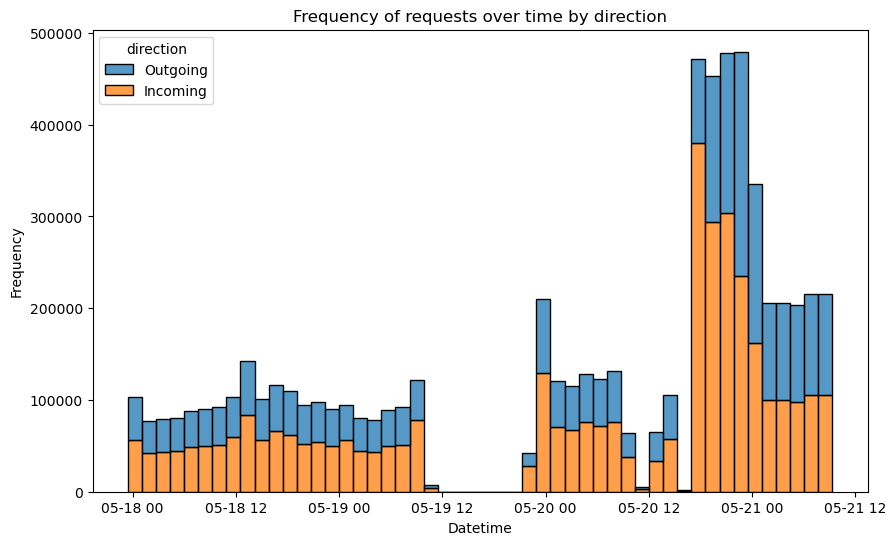

In [25]:
# Create a new column for incoming/outgoing
df['direction'] = df['outgoing'].map({True: 'Outgoing', False: 'Incoming'})

# Plot the frequency of requests over time, hue by direction
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='datetime', hue='direction', multiple="stack", bins=50, edgecolor='black')
plt.title('Frequency of requests over time by direction')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


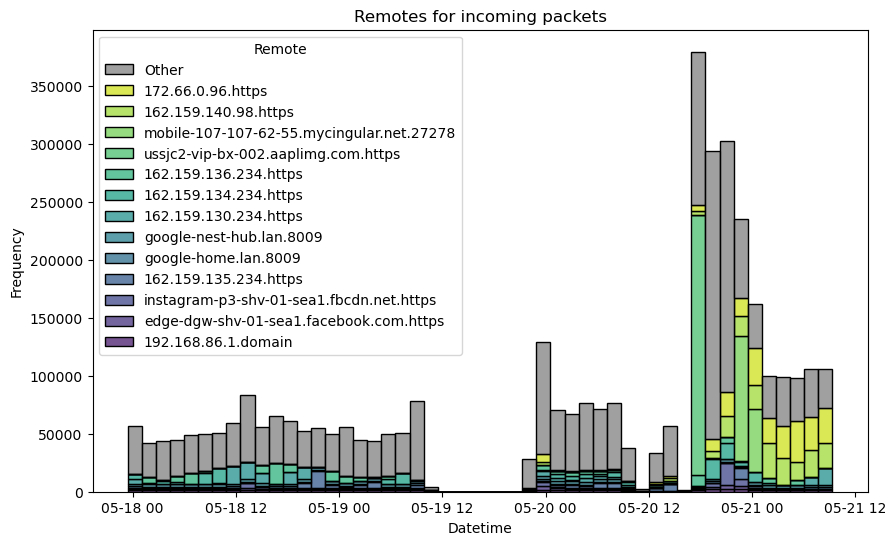

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = data.groupby(


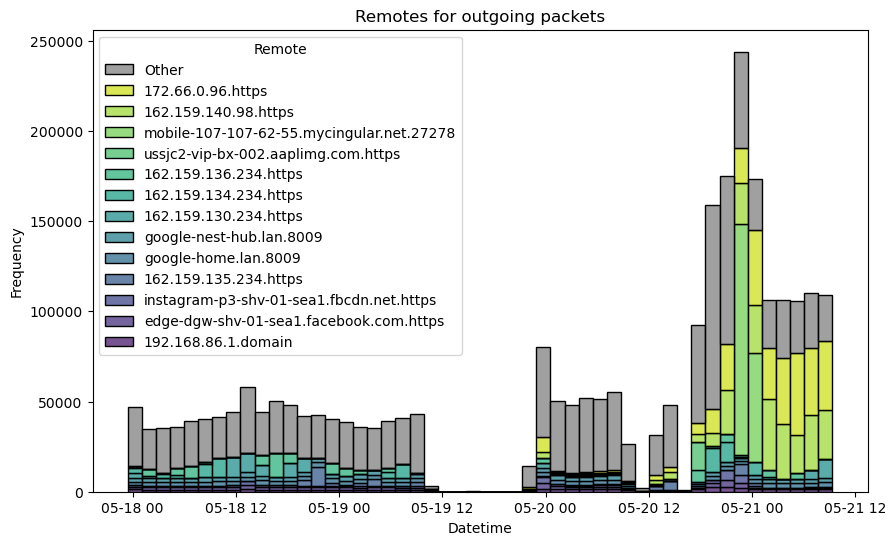

In [26]:
# Plot the frequency of requests over time, hue by remote destination
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['incoming']], x='datetime', hue='Remote', multiple="stack", bins=50, edgecolor='black',palette=colors_dict)
plt.title('Remotes for incoming packets')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()

# Plot the frequency of requests over time, hue by remote destination
plt.figure(figsize=(10, 6))
sns.histplot(data=df[df['outgoing']], x='datetime', hue='Remote', multiple="stack", bins=50, edgecolor='black',palette=colors_dict)
plt.title('Remotes for outgoing packets')
plt.xlabel('Datetime')
plt.ylabel('Frequency')
plt.show()